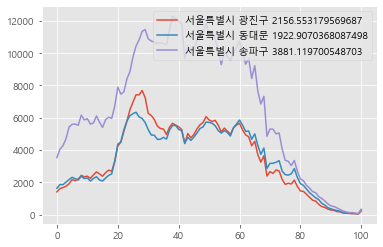

In [95]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import platform
if platform.system() == 'Windows':  # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
f = open('population.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)
list_data = list(data)[1:]
CONST_GWANGJIN = "광진구"
address_list = [i[0][:9] for i in list_data] ## 주소 리스트 생성

## 숫자로 다 만들어주고
for idx, val in enumerate(list_data):
    for n_idx, n_val in enumerate(val[3:]):
        val[n_idx + 3] = int(n_val.replace(',', ''))

gwangjin = []
## 필요없는 데이터 빼주고
for idx, val in enumerate(list_data):
    list_data[idx] = val[3:]
    if CONST_GWANGJIN in val[0]:
        gwangjin = np.array(val[3:])
## 광진구 데이터랑 모두 제곱 차 구하고 화양동, 가장 높은 것, 가장 낮은 것
gap_list = []
for data in list_data:
    gap_list.append(np.sum(np.square(data - gwangjin)))
gap_list = np.argsort(gap_list)
gj_index, min_index, max_index = gap_list[0], gap_list[1], gap_list[-1] ## 0번은 광진구이기에 빼줌

plt.style.use('ggplot')
plt.plot(list_data[gj_index], label=f'{address_list[gj_index]} {np.std(list_data[gj_index])}')
plt.plot(list_data[min_index],
         label=f'{address_list[min_index]} {np.std(list_data[min_index])}')
plt.plot(list_data[max_index],
         label=f'{address_list[max_index]} {np.std(list_data[max_index])}')
plt.legend()
plt.show()
